##Introduction

###This project explores the application of the Support Vector Machine (SVM) algorithm to the Titanic dataset, one of the most popular datasets available on Kaggle. The Titanic dataset contains information on the passengers aboard the RMS Titanic, which tragically sank on April 15, 1912. The dataset includes features such as passenger demographics, class, fare, and other relevant attributes that may contribute to understanding the likelihood of passenger survival.

###The main objective of this analysis is to apply the SVM algorithm for classification, aiming to predict whether a passenger survived or not based on the available features. SVM is particularly effective in scenarios where the dataset may contain complex patterns, as it finds an optimal hyperplane to distinguish between classes with maximum margin. This project will demonstrate the full data science workflow, including data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation of the SVM model.



In [1]:
#Importing Necessary Libraries
import pandas as pd #It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np #It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
from sklearn import datasets #Imports tools to load and use built-in or fetched datasets for machine learning tasks.
from sklearn.model_selection import train_test_split #Imports the function to split data into random train and test subsets for model evaluation.
from sklearn.preprocessing import StandardScaler #Imports the tool to standardize features by removing the mean and scaling to unit variance.
from sklearn.svm import SVC #Imports the Support Vector Classification model for building classification models.
from sklearn.metrics import accuracy_score #Imports the tool to calculate the accuracy of a classification model.


In [2]:
df2 = pd.read_csv("train.csv") #Loads the data from the CSV file "train.csv" into a pandas DataFrame named df2.

In [3]:
df2.head() #Displays the first 5 rows of the DataFrame df2.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Summarizing the Dataset
print(df2.head())  # Displaying the first 5 rows of the dataset
print(df2.describe())  # Summary statistics of the dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
df2.fillna({'Embarked': 'mode()[0]'}, inplace=True) #Attempts to fill missing values in the 'Embarked' column with the mode.

In [7]:
# converts the categorical columns 'Sex' and 'Embarked' into numerical representations using one-hot encoding, removing the first category to avoid redundancy.
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Drop irrelevant columns
df2.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [9]:
# Drop irrelevant columns
df2.drop(columns=['Cabin'], inplace=True)

In [10]:
df2.isnull().sum() #Calculates and displays the number of missing values in each column of the DataFrame df2.

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0
Embarked_mode()[0],0


###There is 177 missing values in the Age column.


In [12]:
# Impute missing values in the 'Age' column with the mean
mean_age = df2['Age'].mean()
df2.fillna({'Age' : 'mean_age'}, inplace=True)

In [13]:
df2.isnull().sum() #Calculates and displays the number of missing values in each column of the DataFrame df2.

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0
Embarked_mode()[0],0


###Now we can see that there is no missing value in our dataframe.

In [14]:
#Segregating the Dataset into Input (X) and Output (y)
X = df2.drop('Survived', axis=1)
y = df2['Survived']

In [15]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_mode()[0]
0,3,22.000000,1,0,7.2500,True,False,True,False
1,1,38.000000,1,0,71.2833,False,False,False,False
2,3,26.000000,0,0,7.9250,False,False,True,False
3,1,35.000000,1,0,53.1000,False,False,True,False
4,3,35.000000,0,0,8.0500,True,False,True,False
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,False,True,False
887,1,19.000000,0,0,30.0000,False,False,True,False
888,3,29.699118,1,2,23.4500,False,False,True,False
889,1,26.000000,0,0,30.0000,True,False,False,False


In [16]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


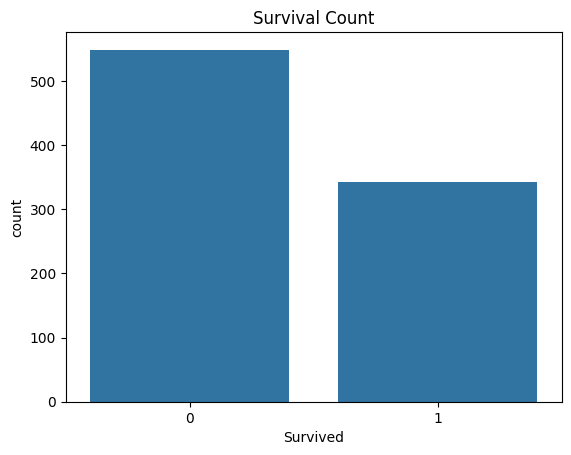

In [17]:
import matplotlib.pyplot as plt #Import libraries for creating visualizations, aliased as plt.
import seaborn as sns #Import libraries for creating visualizations, aliased as sns.
# Check target variable balance
sns.countplot(x='Survived', data=df2)
plt.title('Survival Count')
plt.show()

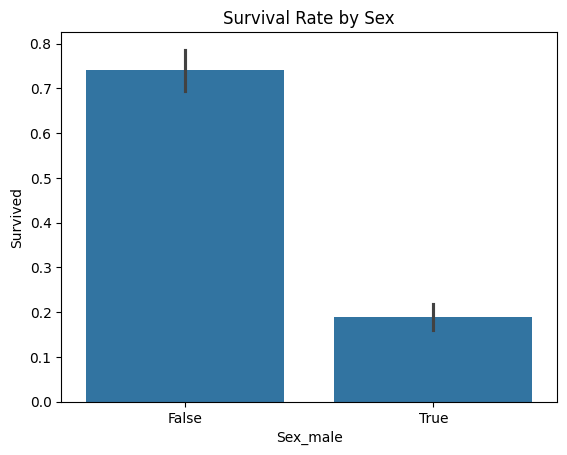

In [18]:
# Example of visualizing survival based on a feature
sns.barplot(x='Sex_male', y='Survived', data=df2)
plt.title('Survival Rate by Sex')
plt.show()

In [19]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Those two lines together standardize the features in the DataFrame X using StandardScaler and store the result in X_scaled.

In [20]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Training the initial SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Evaluate on test data
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #Displays the dimensions (number of rows and columns) of the training and testing datasets.

((712, 9), (179, 9), (712,), (179,))

In [23]:
#Loading the Model (SVM in this case)
model = SVC(kernel='linear', random_state=42)

In [24]:
#Training the Model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# Predicting the Result using the Trained Model
y_pred = model.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [27]:
# Calculating the Accuracy of the Trained Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")

Accuracy of the SVM model: 78.21%


In [28]:
# Predicting the Output of Single Sample using the Trained Model
# Let's use the first sample from the test data as an example
sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample)
print(f"Predicted class for the sample: {predicted_class[0]}")
print(f"Actual class for the sample: {y_test.values[0]}")

Predicted class for the sample: 0
Actual class for the sample: 1


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_svc = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.804 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.754 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.754 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.789 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.746 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.706 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly

In [30]:
# Train the model with best parameters
best_svc.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [31]:
# Predict and evaluate on the test set
y_pred_tuned = best_svc.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



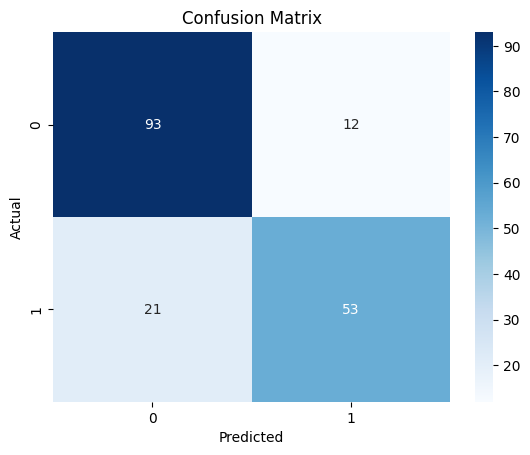

In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


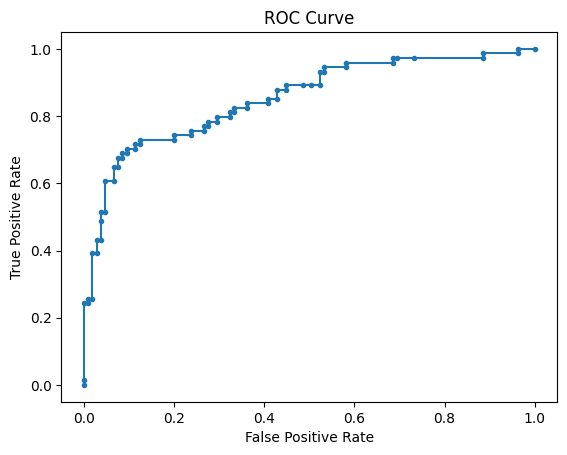

ROC AUC Score: 0.8534105534105534


In [33]:
# ROC Curve
y_pred_proba = best_svc.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


In [34]:
# Cross-validation on the best model
cv_scores = cross_val_score(best_svc, X_scaled, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))


Cross-validation Scores: [0.83240223 0.81460674 0.81460674 0.79775281 0.85393258]
Mean Cross-validation Score: 0.8226602222082733
